In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [37]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df.shape

(8950, 18)

In [38]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [39]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Pré-processamento dos dados

<Axes: >

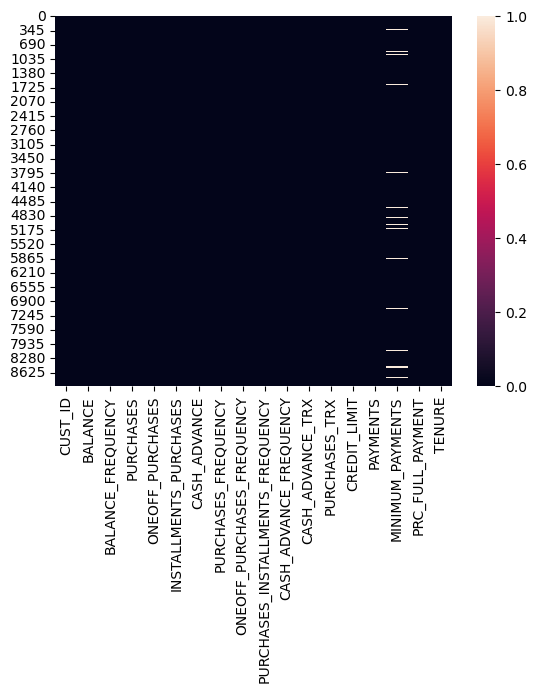

In [40]:
sns.heatmap(creditcard_df.isnull())

In [41]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [42]:
# Substituindo dados nulos
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True),'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True),'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

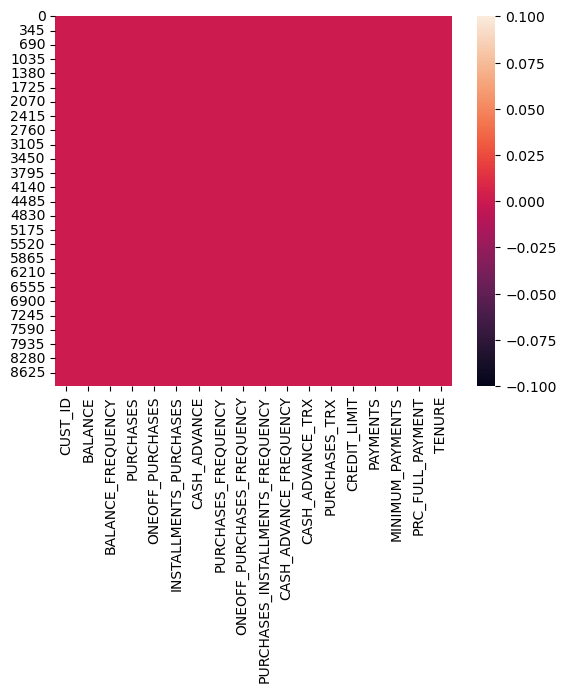

In [43]:
sns.heatmap(creditcard_df.isnull())

In [44]:
creditcard_df.duplicated().sum()

0

In [45]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

# Visualização dos dados

In [46]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\User\AppData\Local\Temp\ipykernel_14428\61888286.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_14428\61888286.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_14428\61888286.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_14428\61888286.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_14428\61888286.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_14428\61888286.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_14428\61888286.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykerne

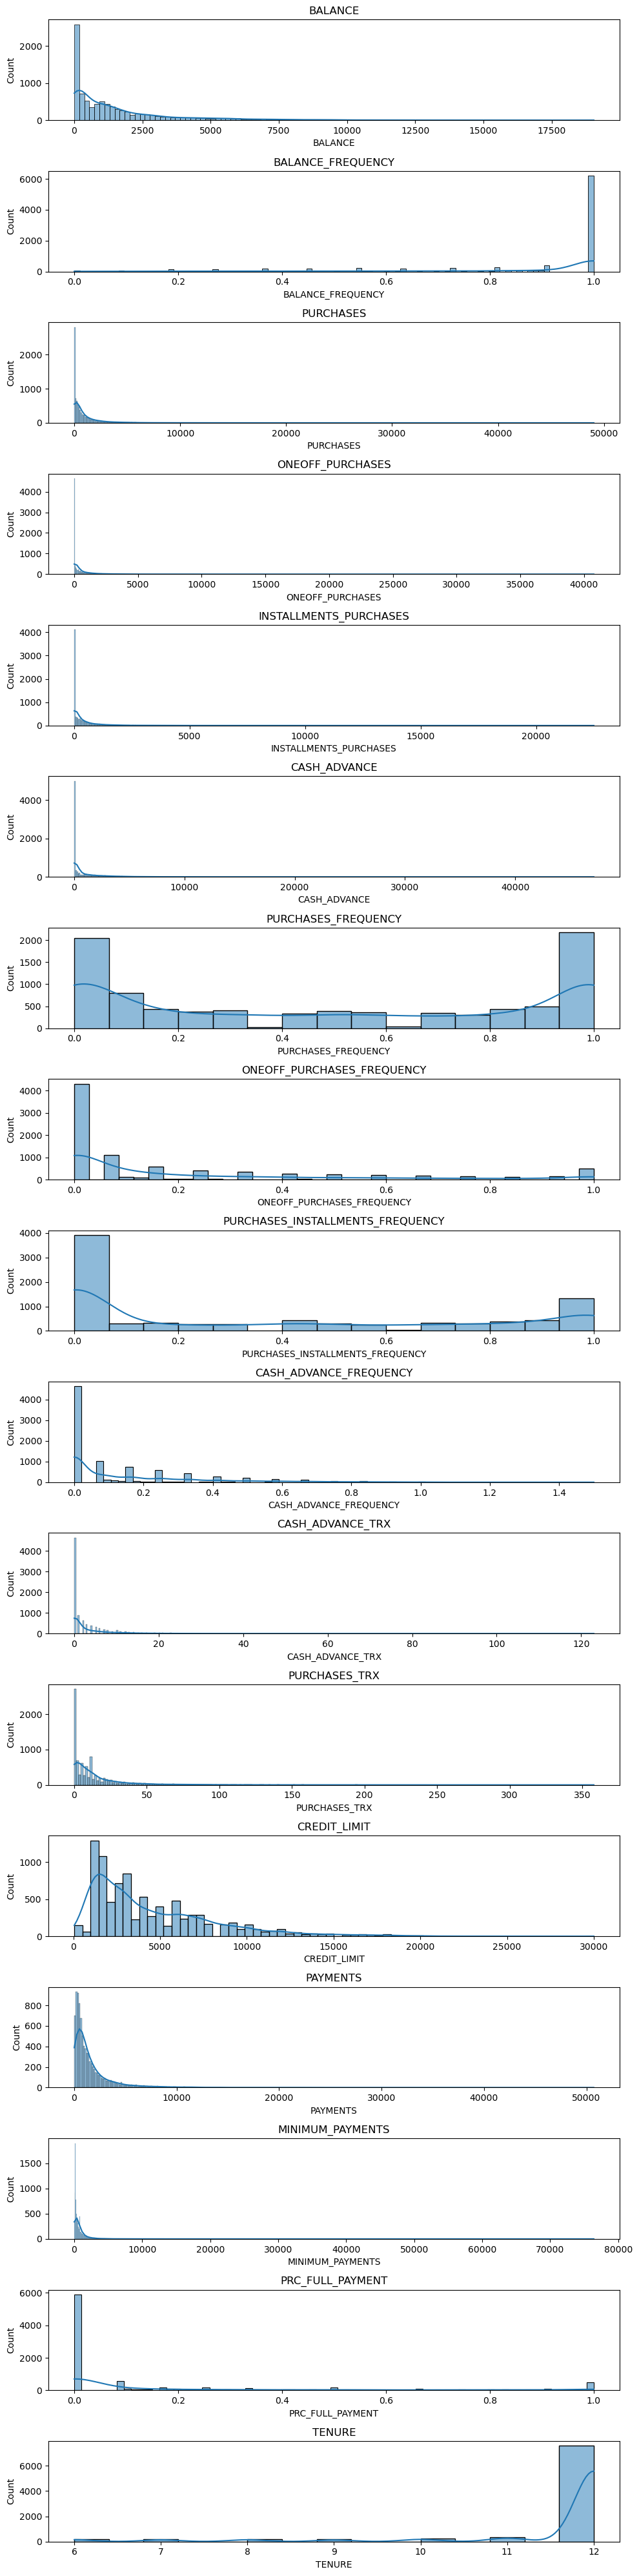

In [47]:
plt.figure(figsize=(10,40))

for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True)
    plt.title(creditcard_df.columns[i])
    plt.tight_layout()
plt.show();

In [48]:
correlations = creditcard_df.corr()

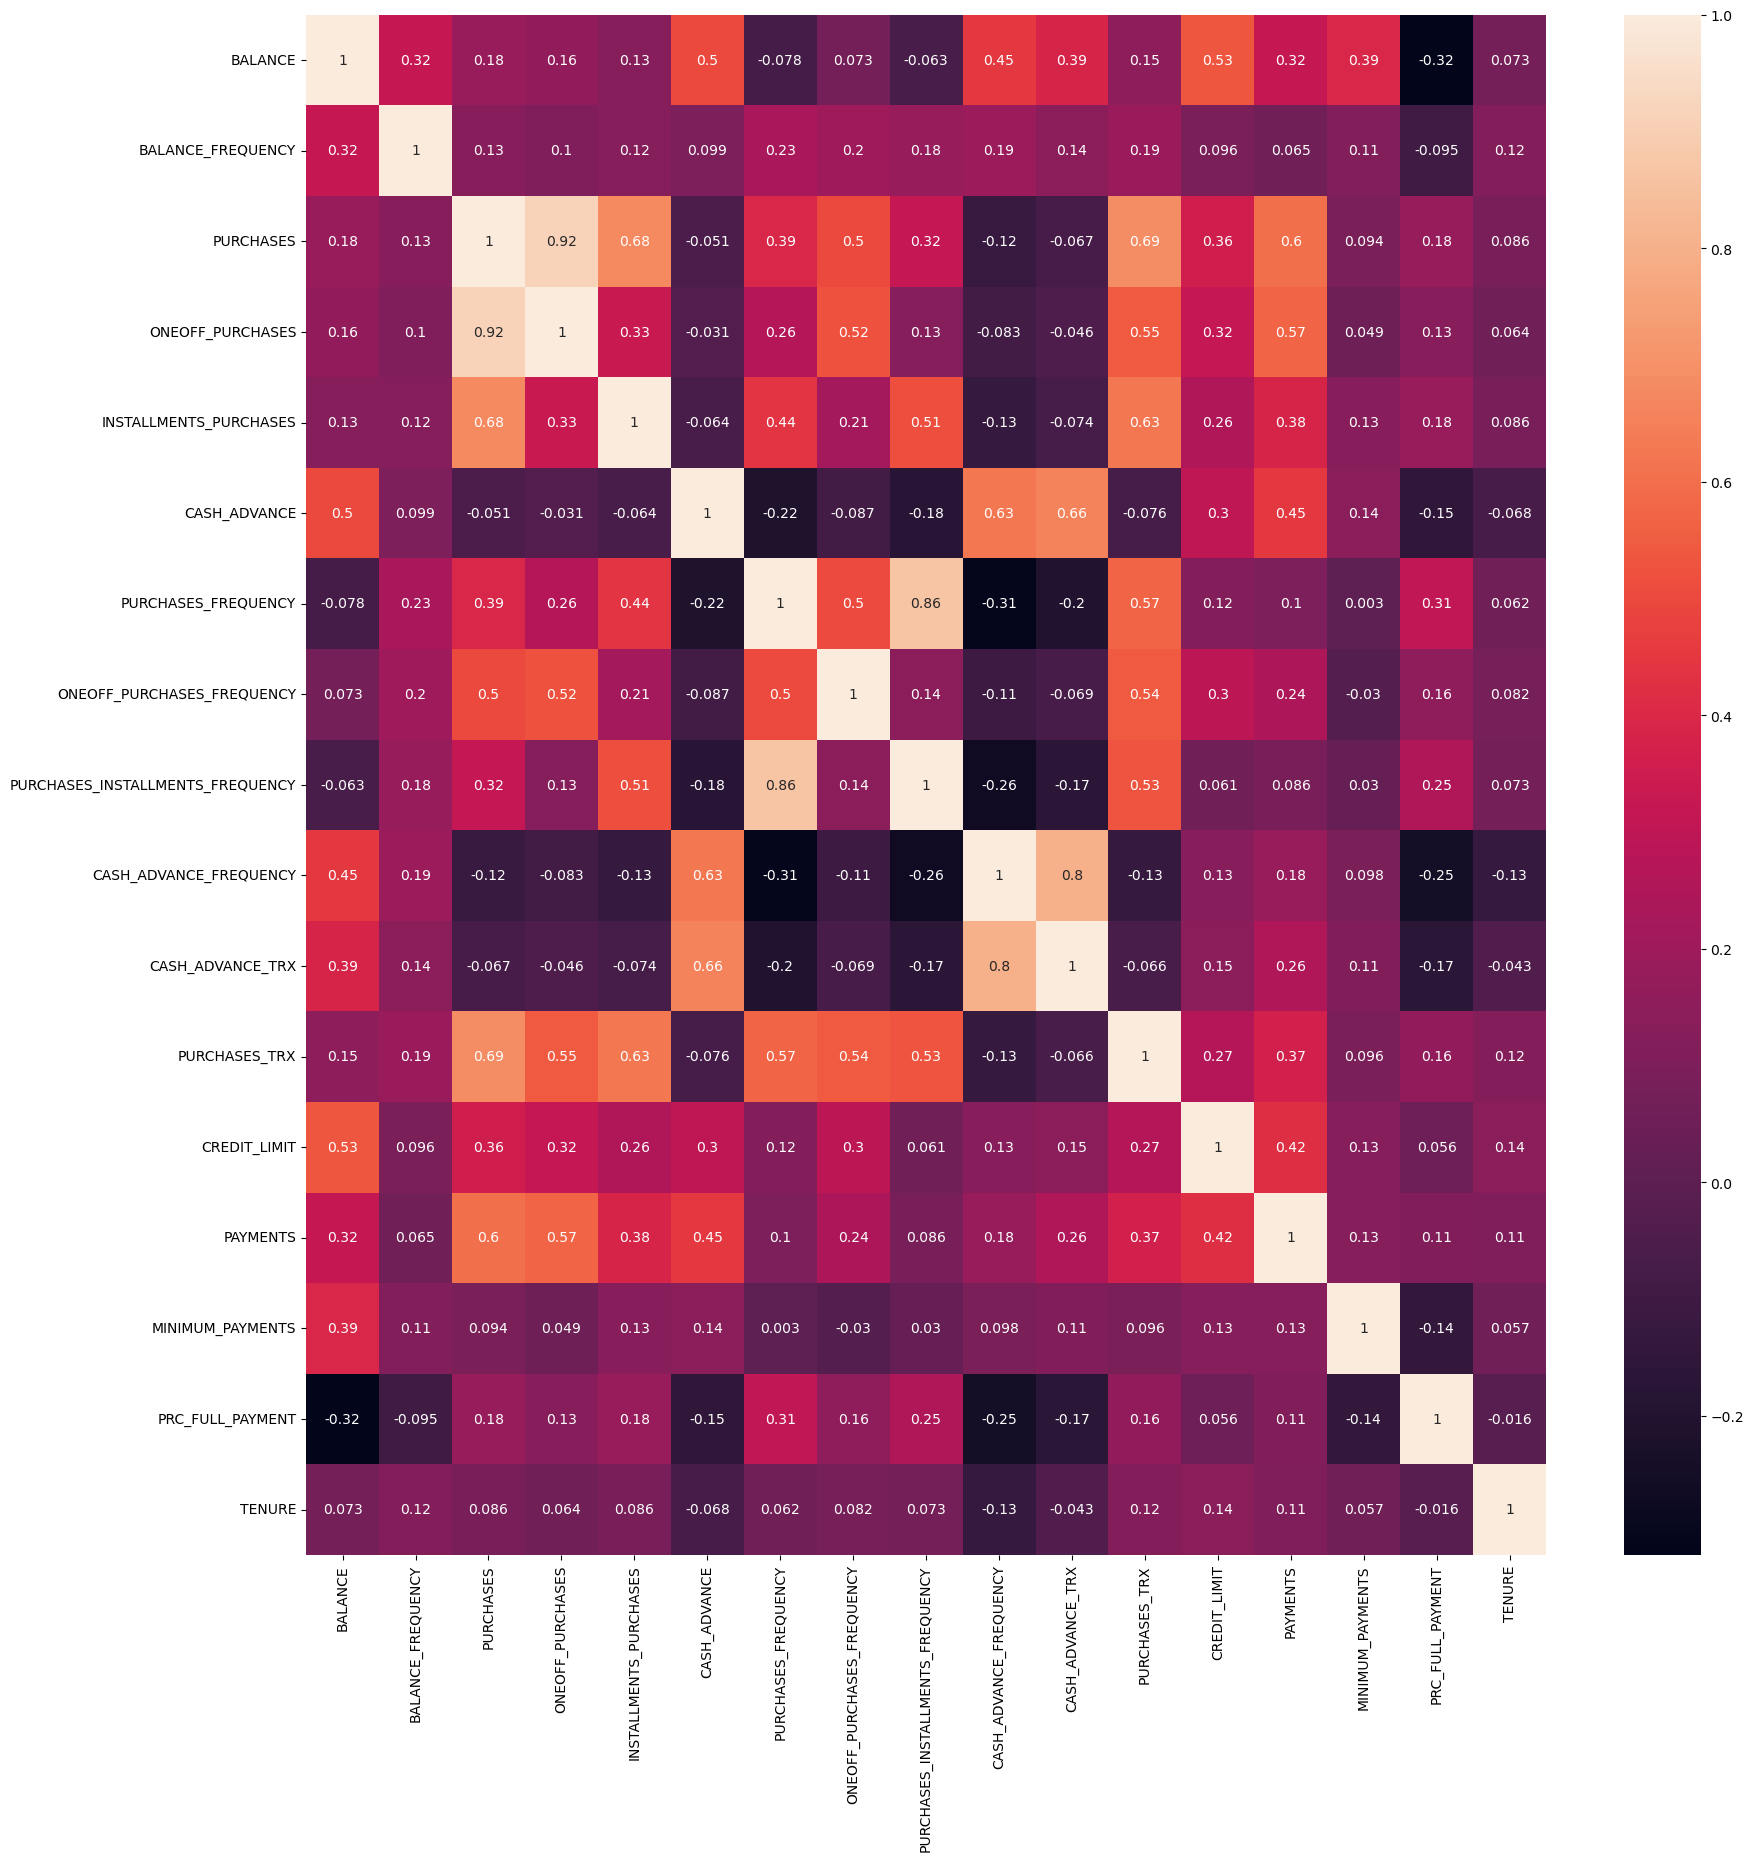

In [49]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot= True);

# K-means

## Definição do número de clusters

In [50]:
scaler = StandardScaler()

creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [51]:
wcss_1 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans (n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_);

C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [52]:
print(wcss_1)

[152150.0000000002, 127784.97295116556, 111986.66699144, 99074.42270603355, 91503.39081843373, 84850.3399037705, 79756.39966936171, 74624.71643963648, 71087.40700879248, 66455.26553539332, 63632.94710602802, 61363.29959806201, 59173.11982619509, 57488.399375130066, 56218.268932552994, 54375.84476945781, 53450.550185134154, 51748.50185132982, 50767.31825669524]


Text(0, 0.5, 'WCSS')

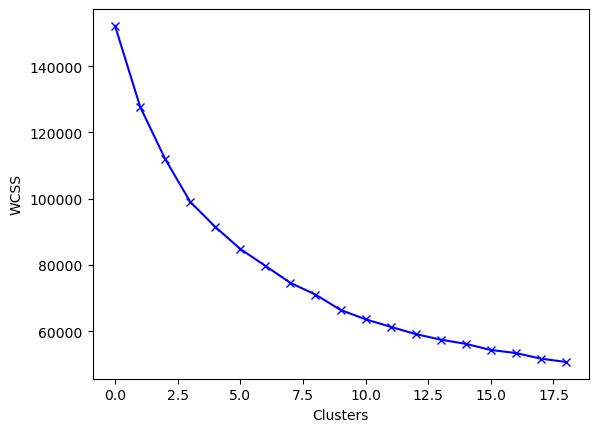

In [53]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

## Agrupamento com k-means

In [54]:
kmeans = KMeans(n_clusters=8)

kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
labels, len(labels)

(array([3, 6, 1, ..., 0, 0, 0]), 8950)

In [56]:
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 625, 1128, 2018, 2771, 1185,  323,  877,   23], dtype=int64))

In [57]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.337200,-0.351274,-0.287007,-0.212744,-0.287412,0.067931,-0.202320,-0.283605,-0.226363,0.305828,-0.000825,-0.387485,-0.562891,-0.391704,-0.209098,0.013610,-3.199775
1,-0.117081,0.403006,0.580440,0.703603,0.079603,-0.331977,0.998641,1.914102,0.214408,-0.417083,-0.332782,0.666360,0.468197,0.172189,-0.155047,0.460736,0.275224
2,-0.358225,0.332237,-0.029857,-0.240689,0.371394,-0.362537,0.996092,-0.380834,1.207247,-0.471898,-0.359596,0.194768,-0.259684,-0.213155,-0.029720,0.312698,0.255518
3,0.011240,0.405020,-0.354335,-0.238911,-0.398790,-0.098672,-0.842068,-0.383299,-0.751677,0.095259,-0.034770,-0.477911,-0.304686,-0.251732,-0.008165,-0.455202,0.273038
4,-0.700916,-2.135919,-0.309790,-0.234351,-0.301835,-0.322887,-0.552623,-0.440210,-0.438526,-0.522023,-0.376648,-0.418105,-0.175016,-0.201945,-0.257046,0.284044,0.201773
5,1.108894,0.475193,2.594940,1.861504,2.715919,-0.122715,1.169176,1.570563,1.290972,-0.265499,-0.123567,3.251353,1.349204,1.531278,0.691210,0.247010,0.335232
6,1.669404,0.390095,-0.221249,-0.157449,-0.233946,2.006144,-0.482682,-0.212973,-0.422983,1.918998,1.925983,-0.271367,1.015509,0.816635,0.507443,-0.390751,0.071837
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [58]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,862.621956,0.794057,390.010464,239.326032,151.164432,1121.325562,0.409150,0.117853,0.274475,0.196343,3.243200,5.078400,2446.423119,599.199915,376.911693,0.157695,7.235200
1,1320.780722,0.972739,2243.324805,1760.273431,483.051374,282.698940,0.891154,0.773471,0.449648,0.051682,0.977837,31.273050,6197.940845,2231.614729,502.876032,0.288472,11.885638
2,818.859626,0.955975,939.415560,192.943370,746.914846,218.614646,0.890131,0.088848,0.844228,0.040713,0.794846,19.551041,3549.613579,1116.079935,794.944505,0.245173,11.859267
3,1587.869436,0.973216,246.161891,195.893630,50.446853,771.950425,0.152388,0.088112,0.065702,0.154206,3.011548,2.830747,3385.877541,1004.403081,845.178372,0.020576,11.882714
4,105.576699,0.371291,341.333789,203.462143,138.122110,301.761115,0.268556,0.071134,0.190156,0.030682,0.678481,4.317300,3857.670417,1148.533664,265.172405,0.236793,11.787342
5,3872.543622,0.989840,6547.334644,3682.153096,2867.039133,721.532763,0.959598,0.670987,0.877503,0.082015,2.405573,95.526316,9403.405573,6166.044918,2475.042173,0.225961,11.965944
6,5039.198156,0.969681,530.502543,331.104880,199.513592,5185.849543,0.296627,0.138924,0.196333,0.519155,16.392246,7.964652,8189.286825,4097.222532,2046.782053,0.039427,11.613455
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [59]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


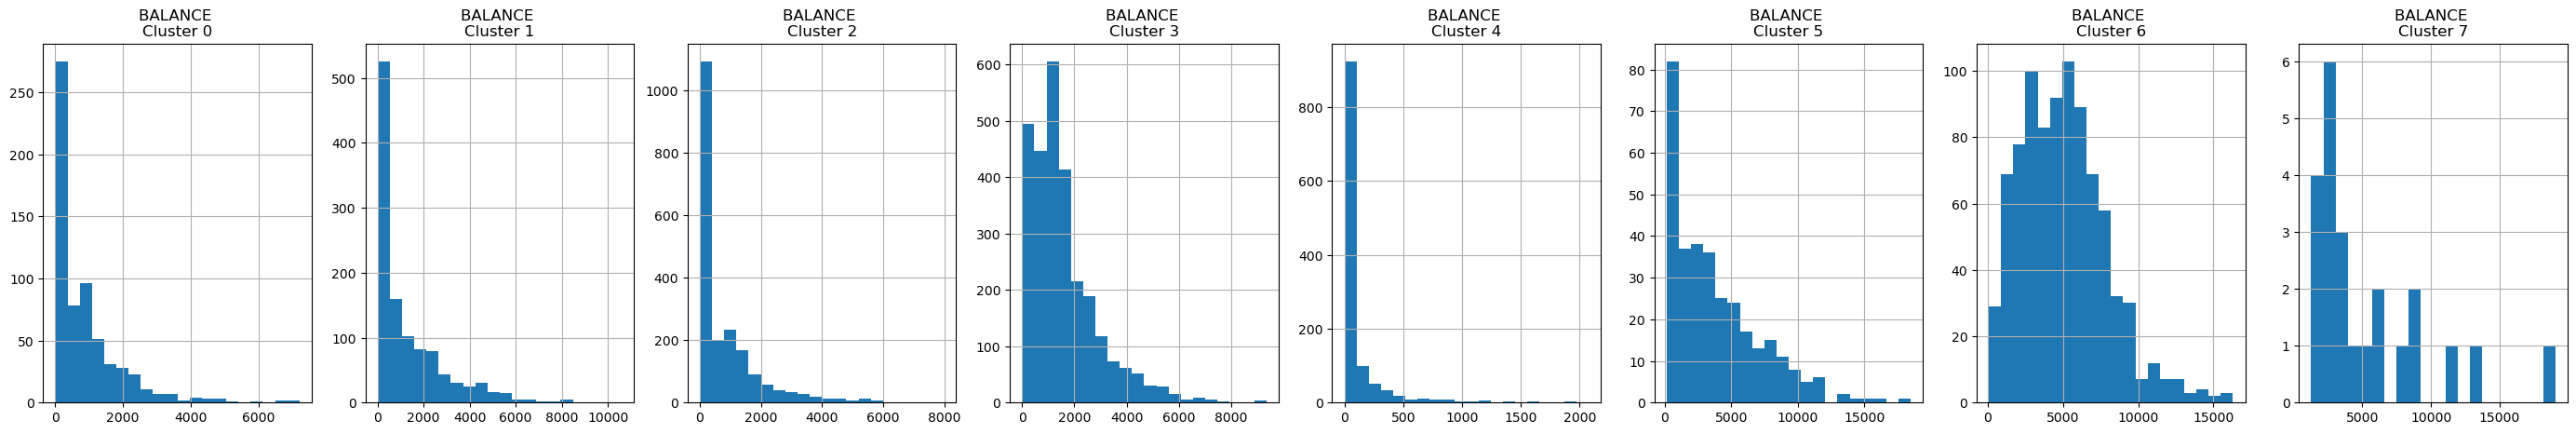

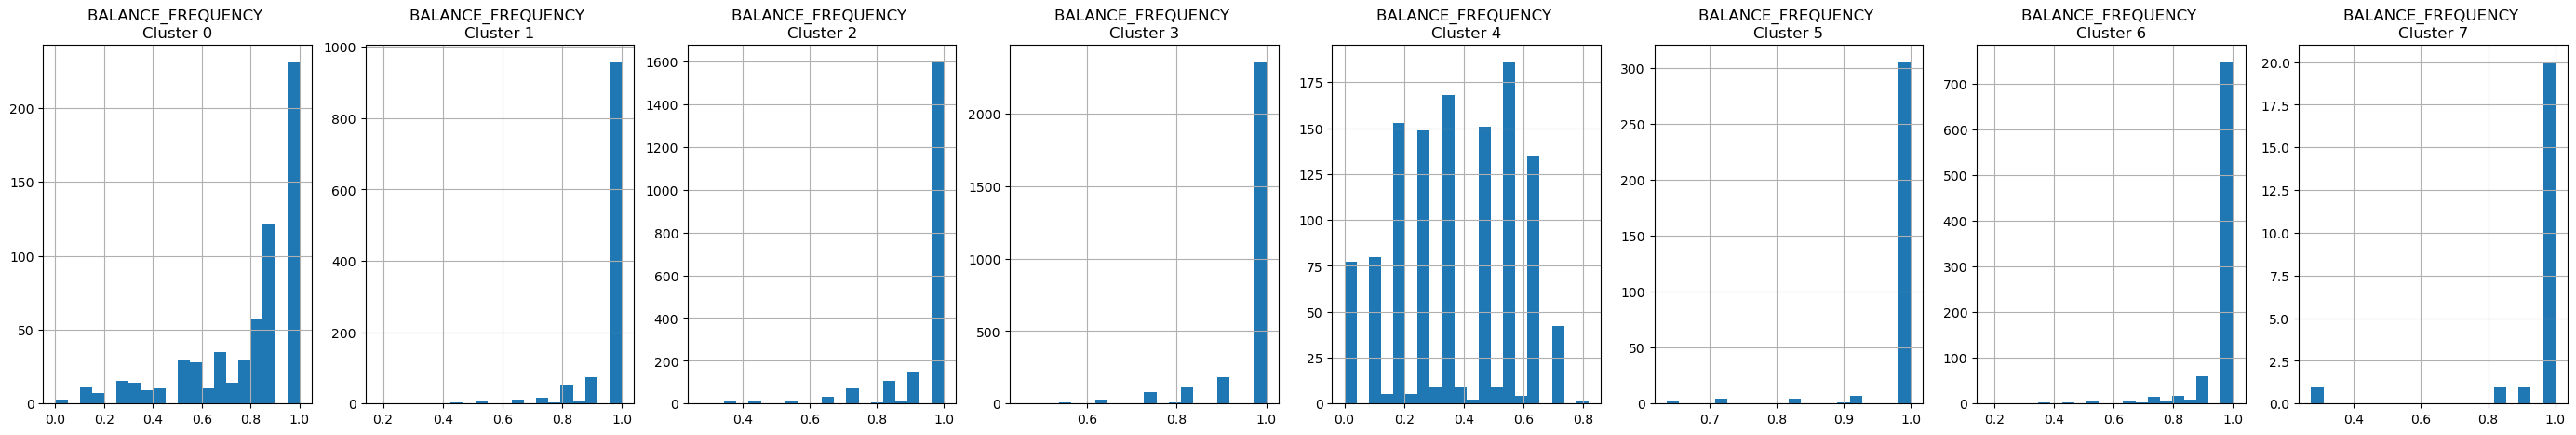

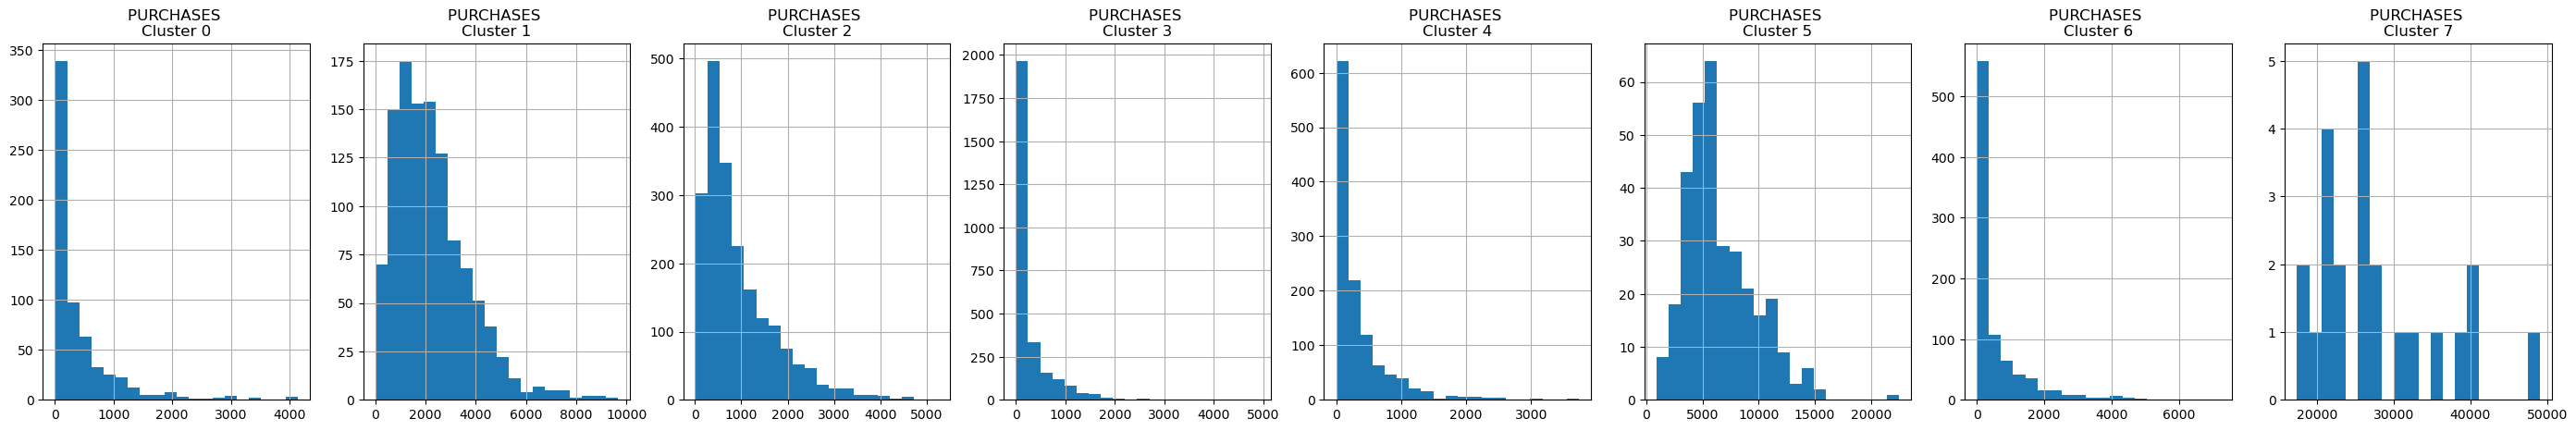

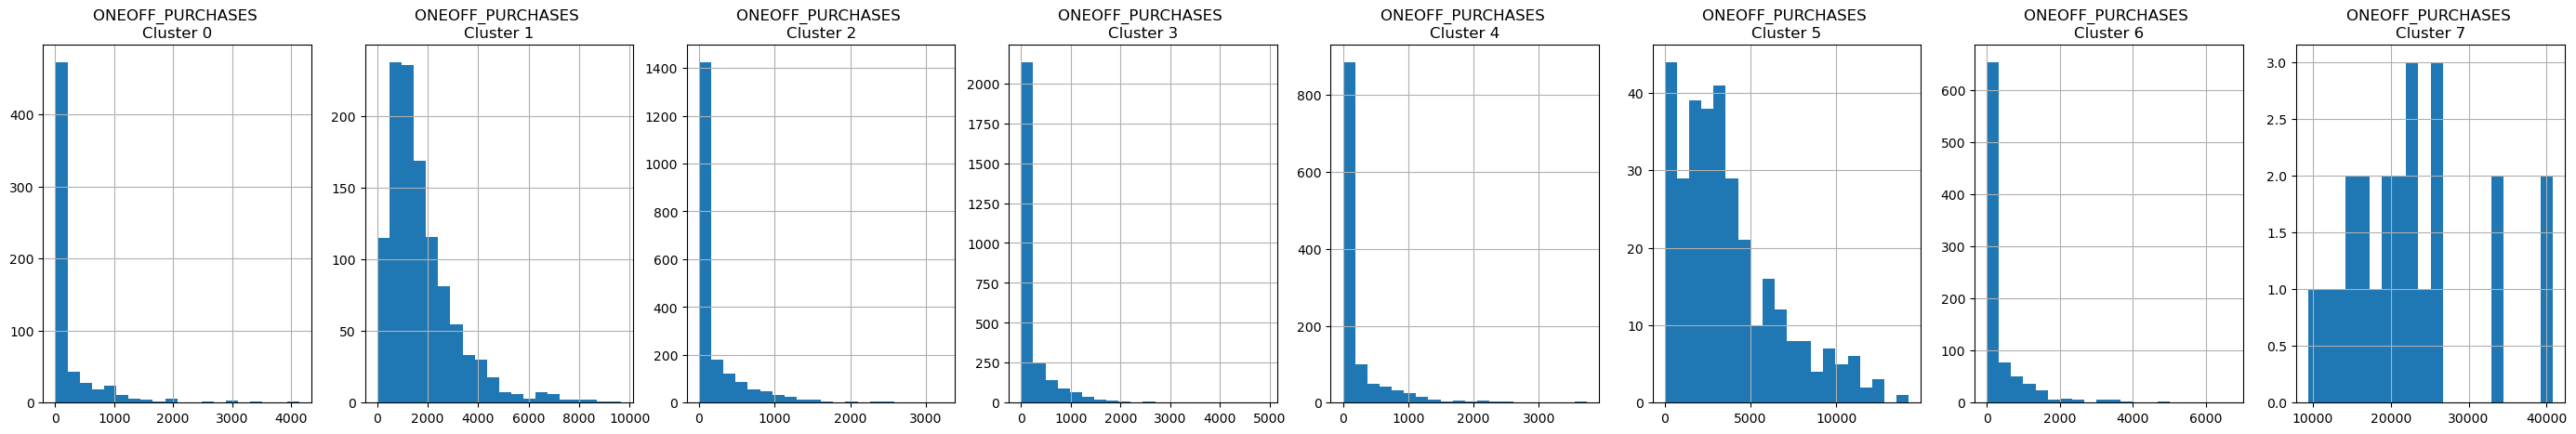

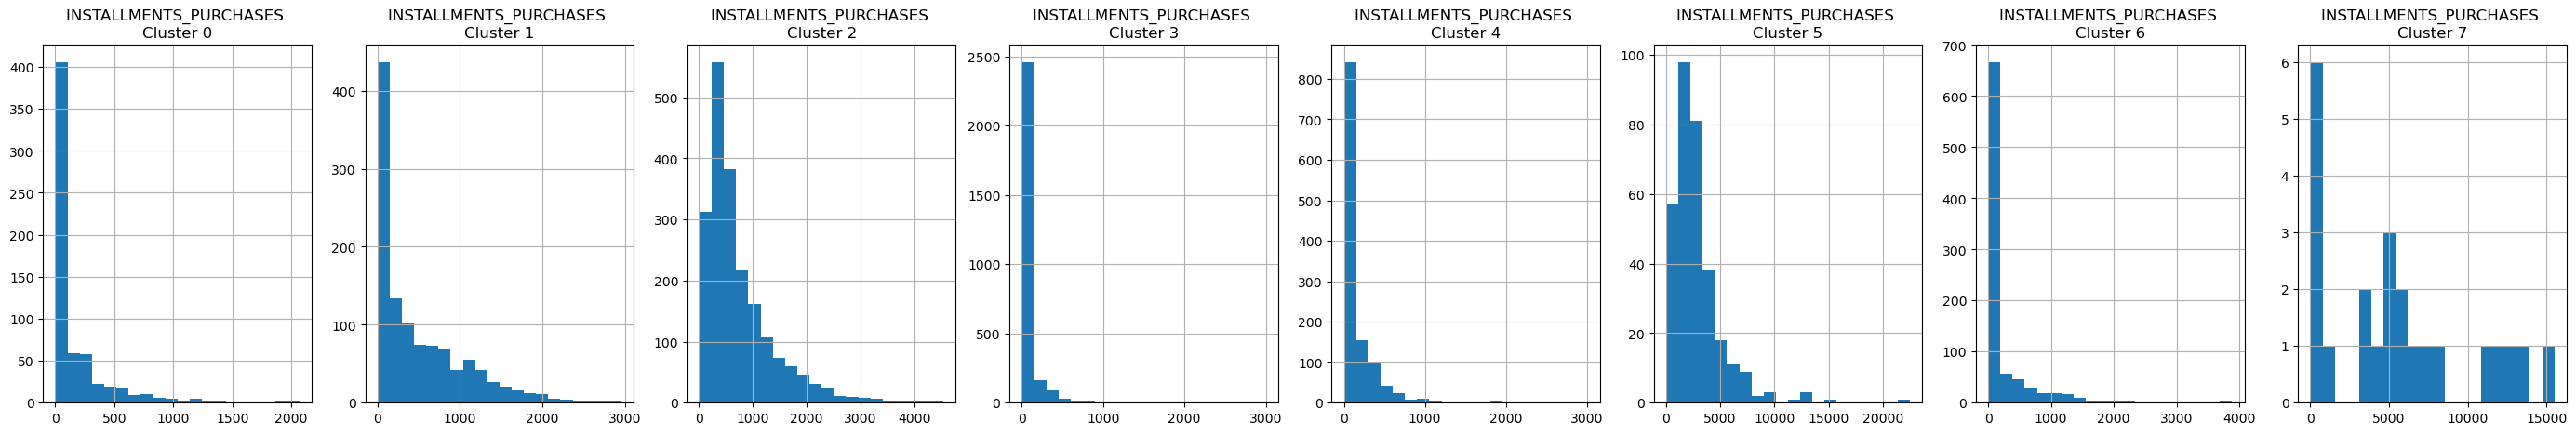

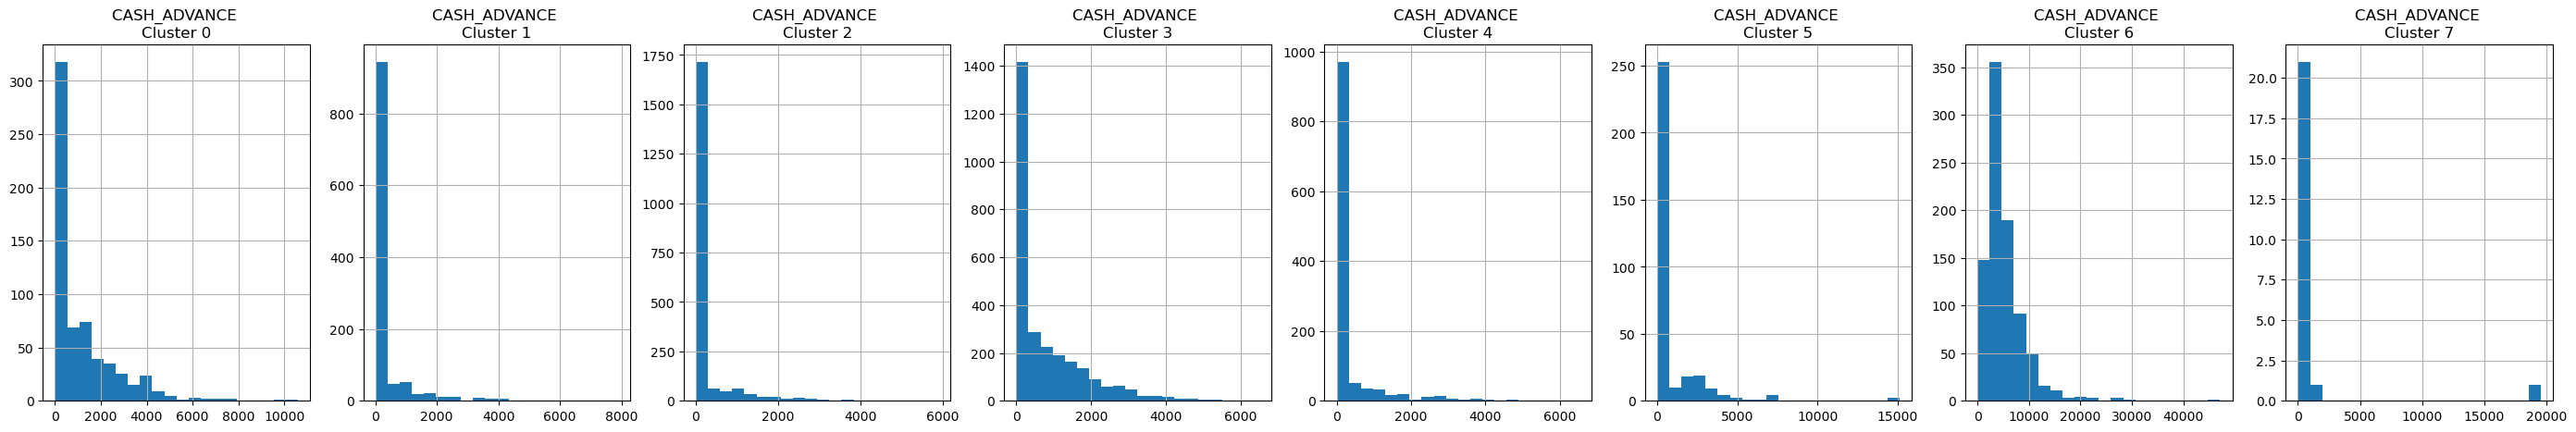

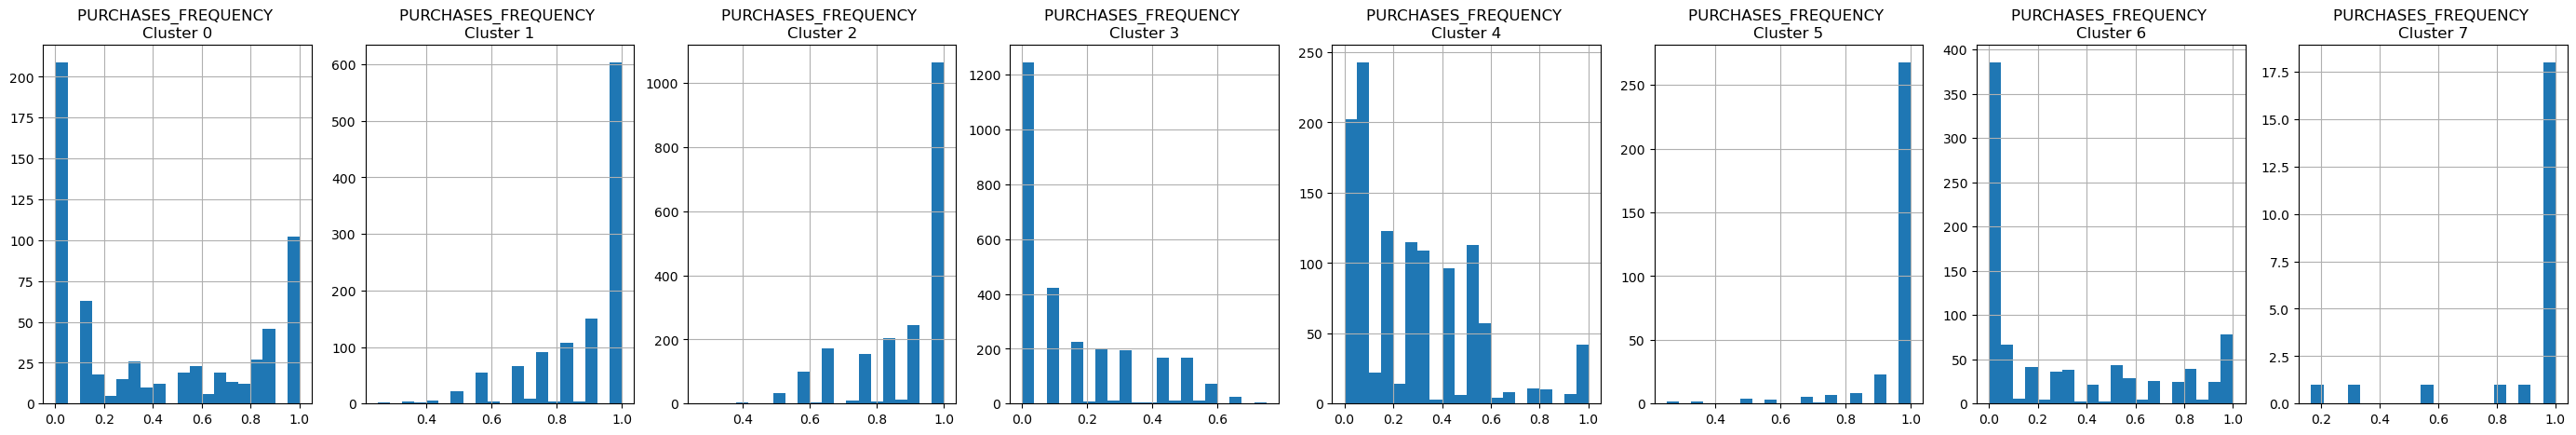

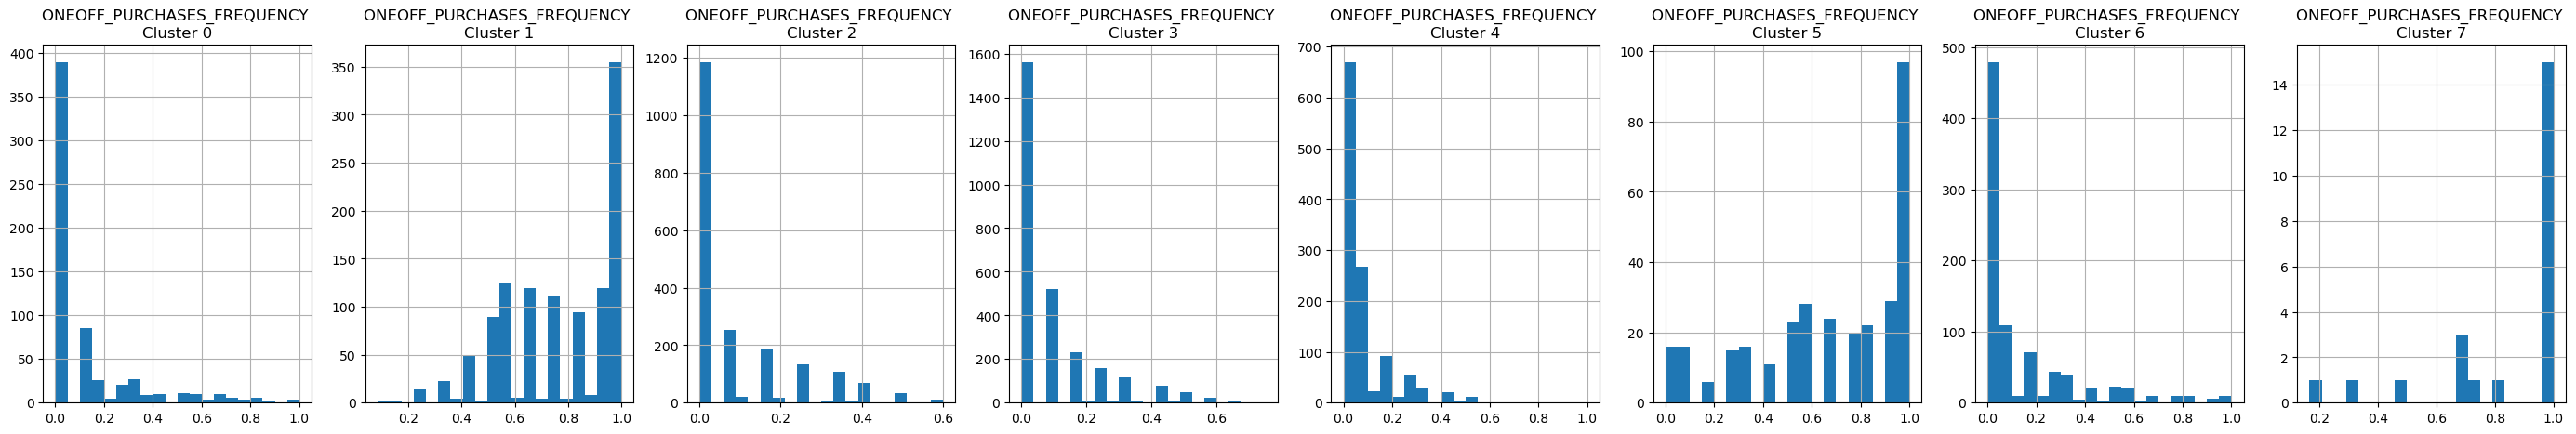

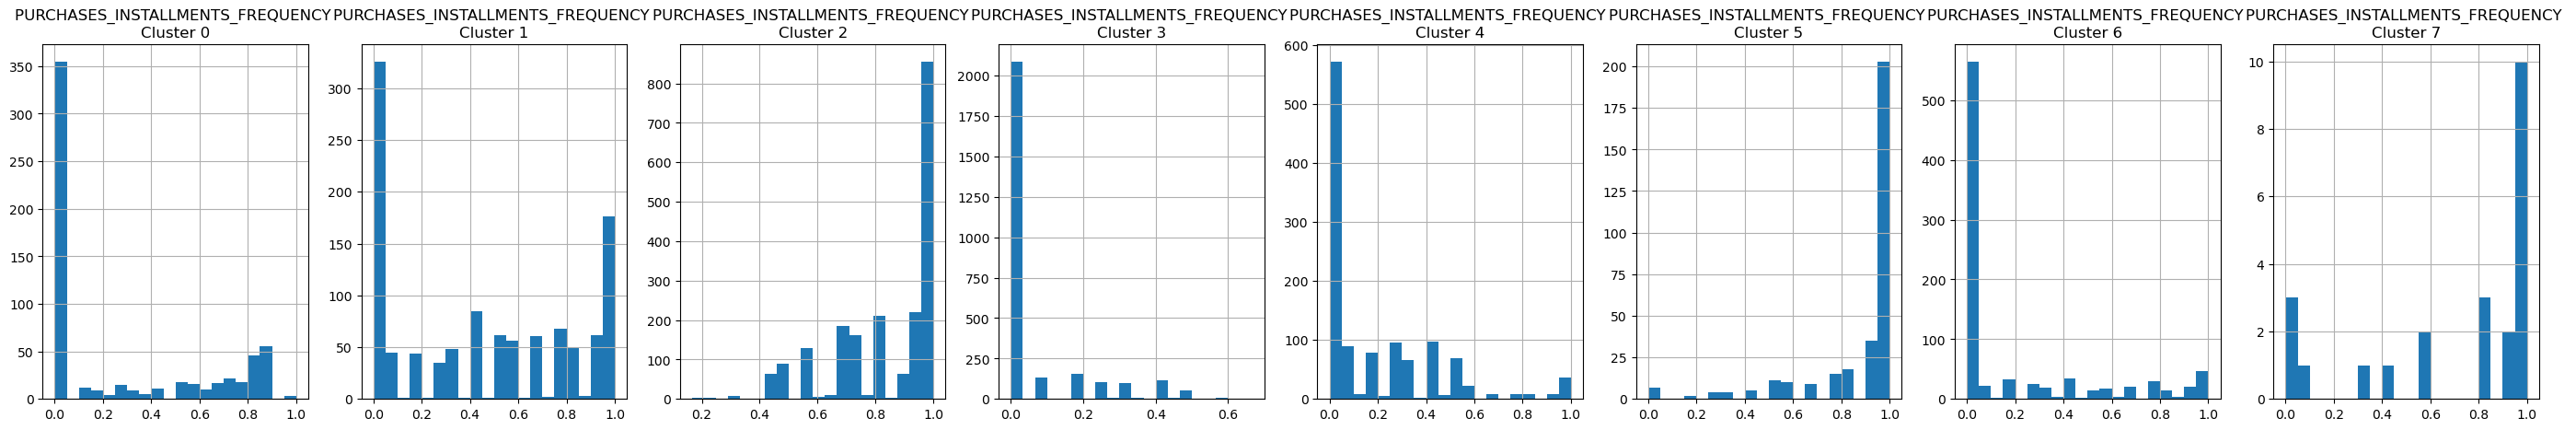

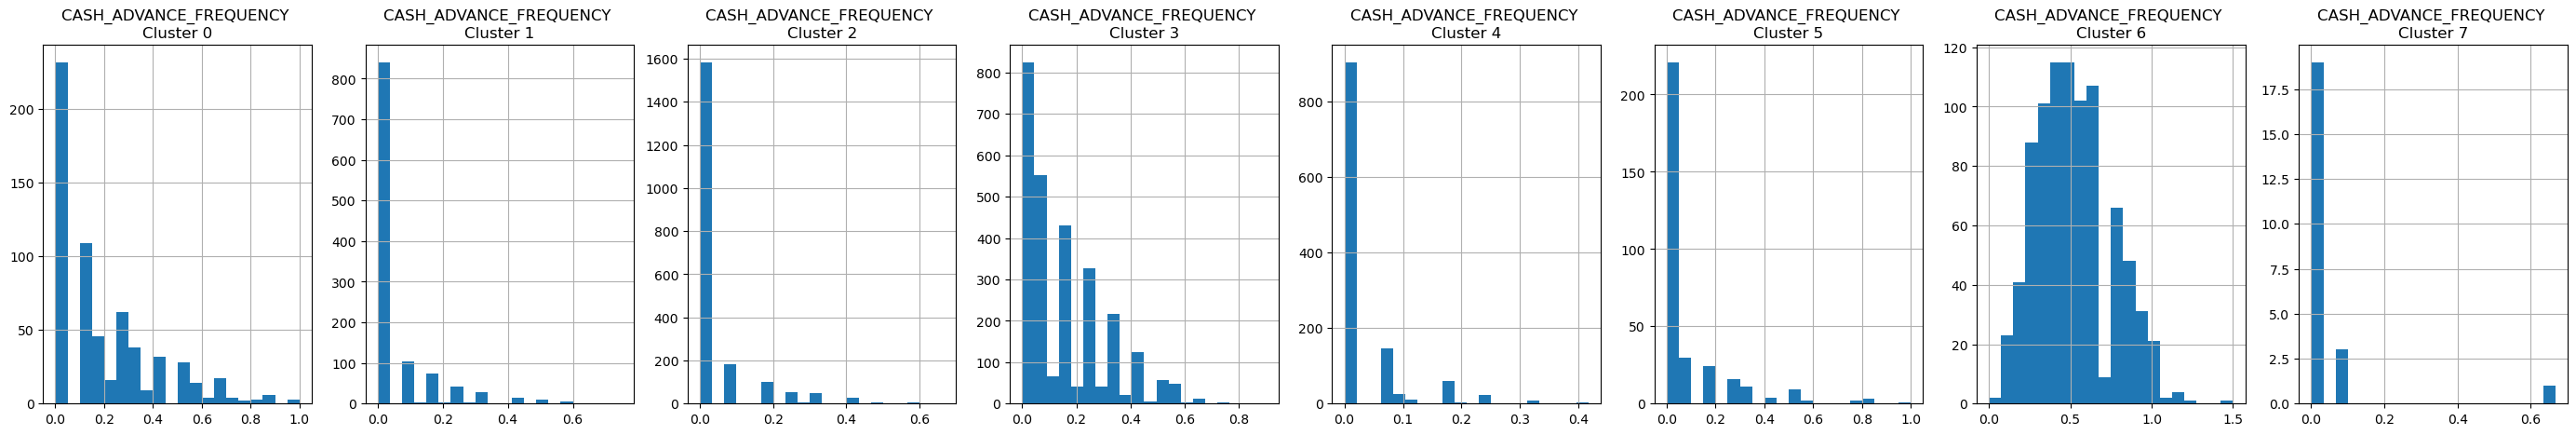

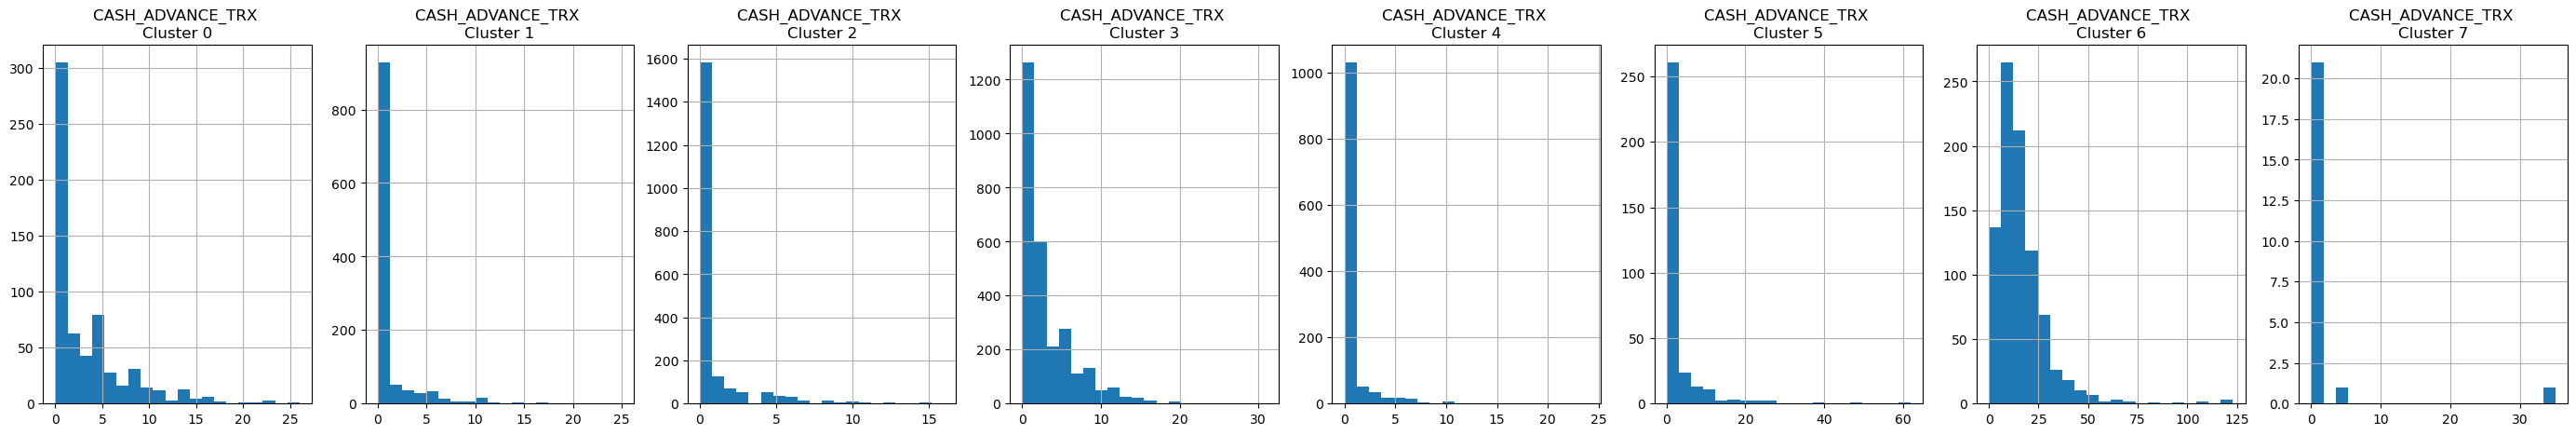

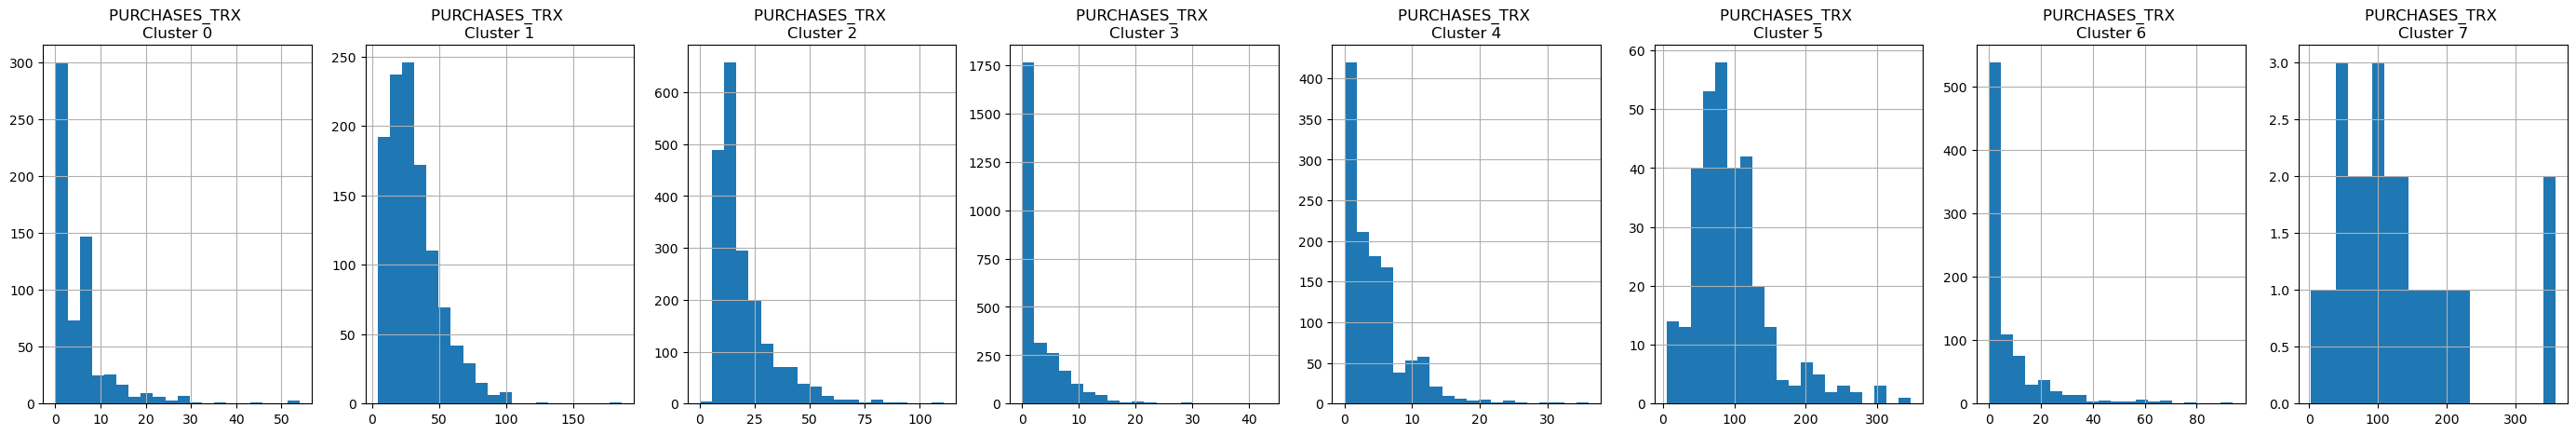

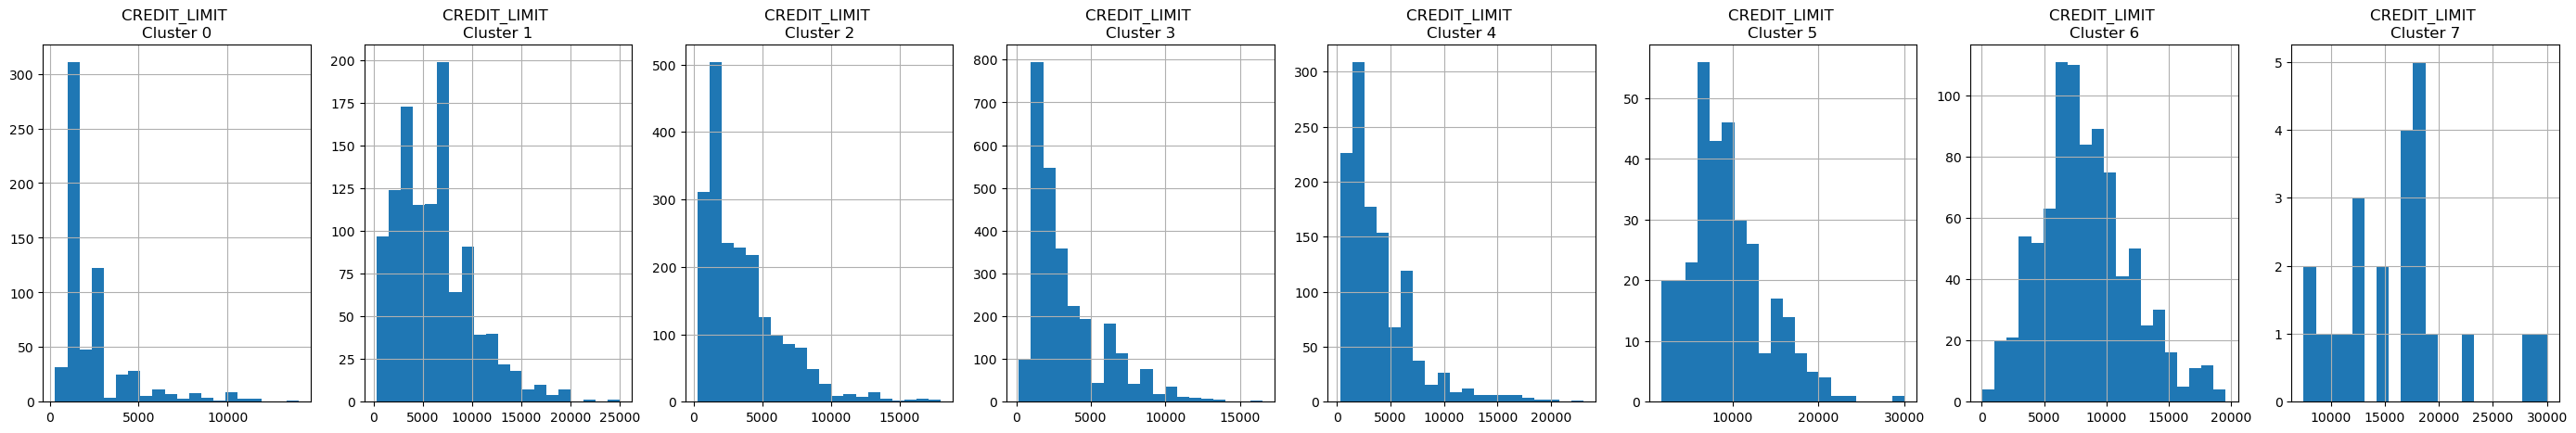

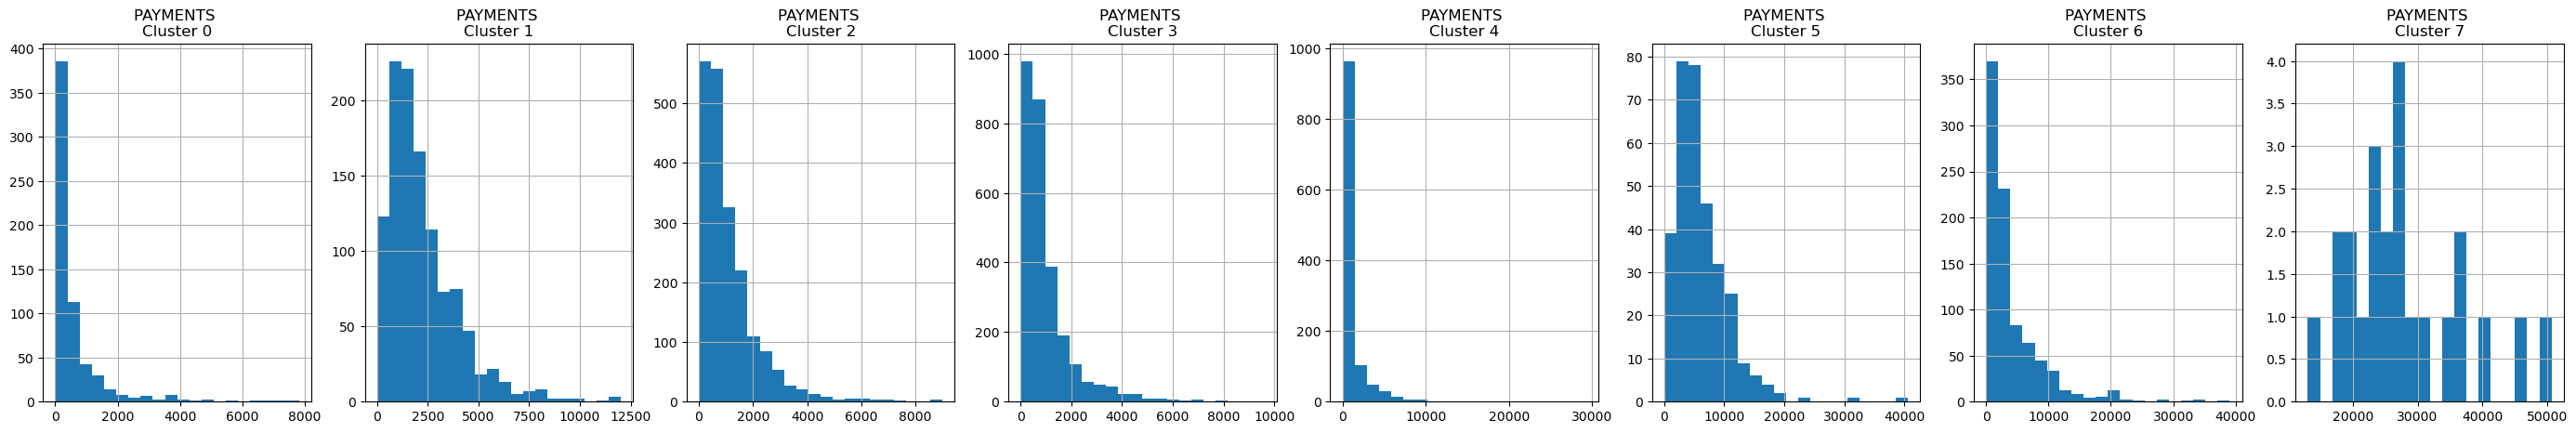

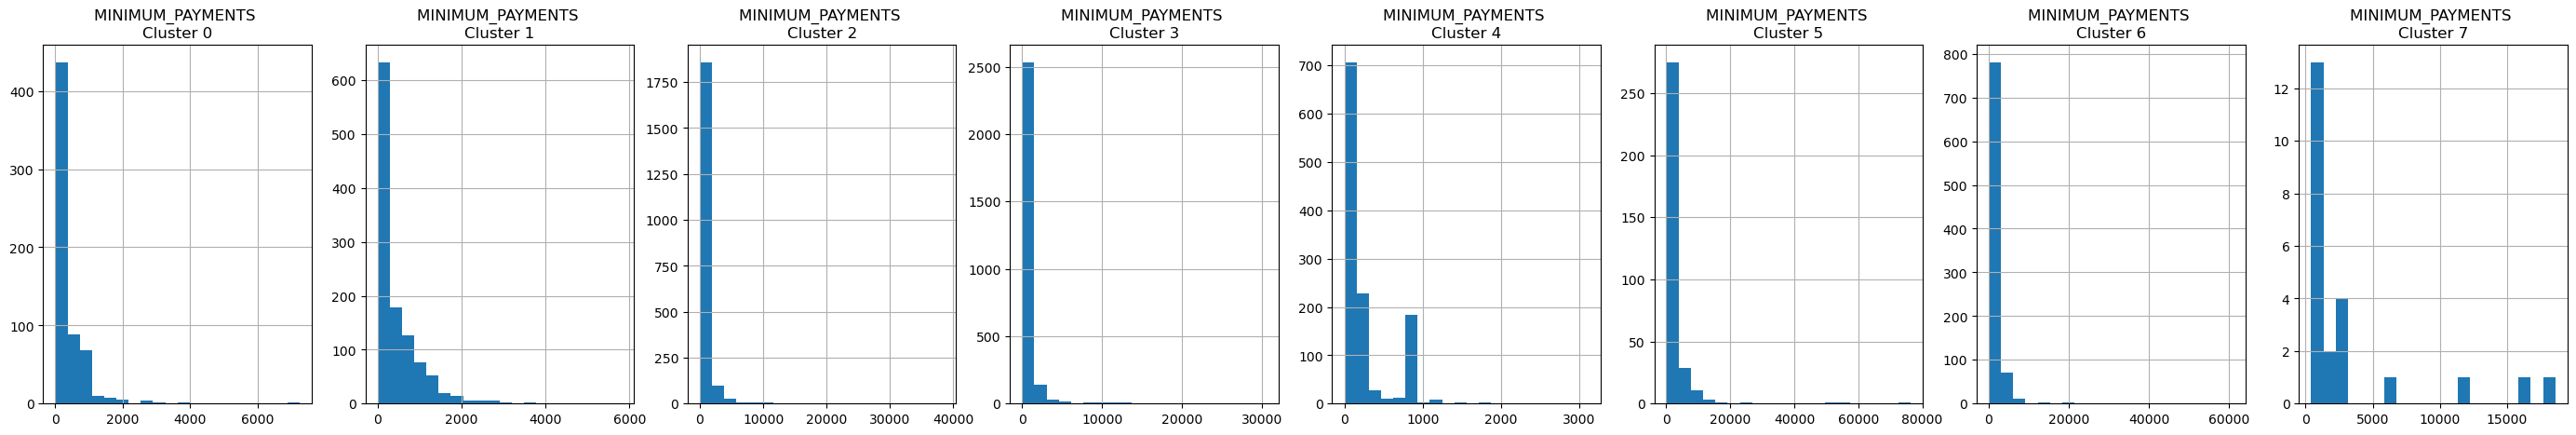

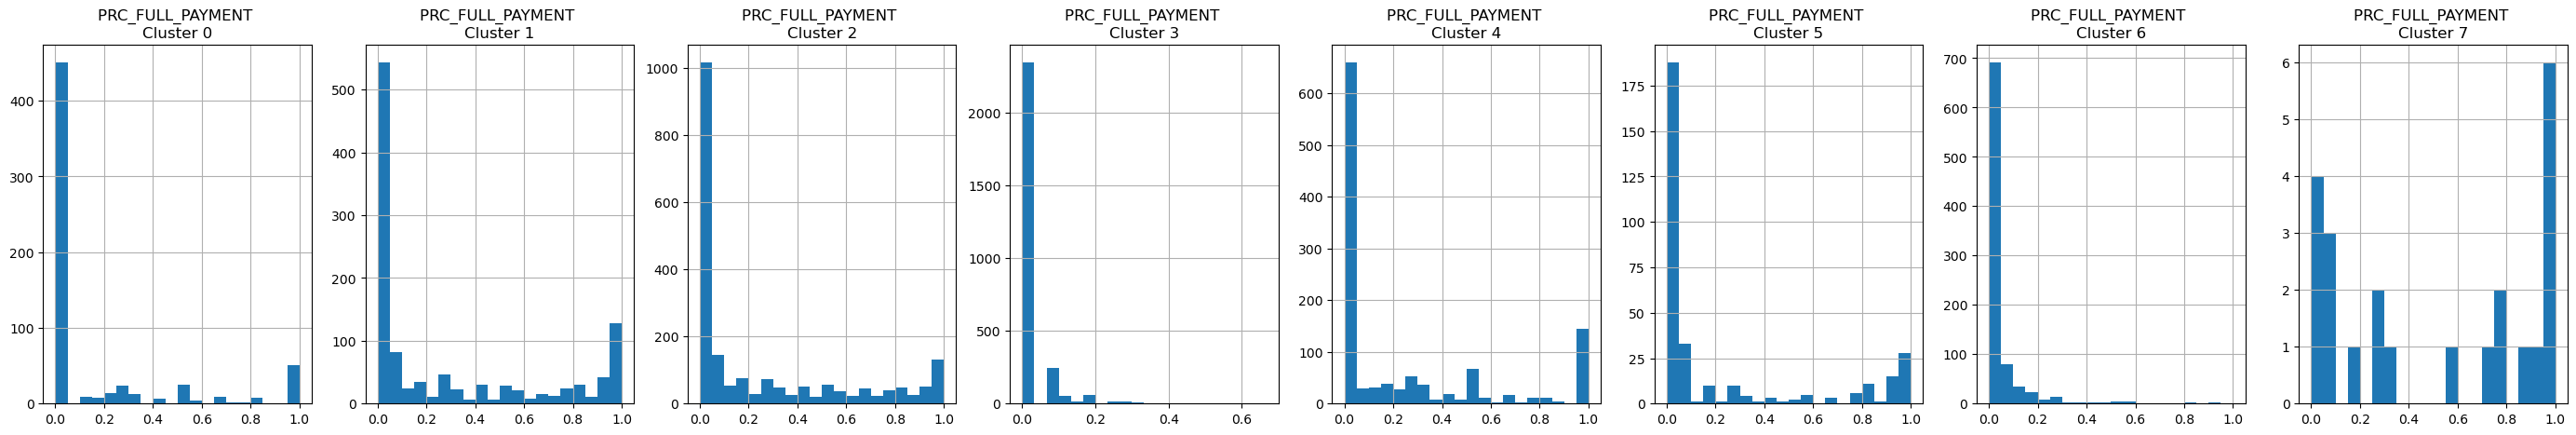

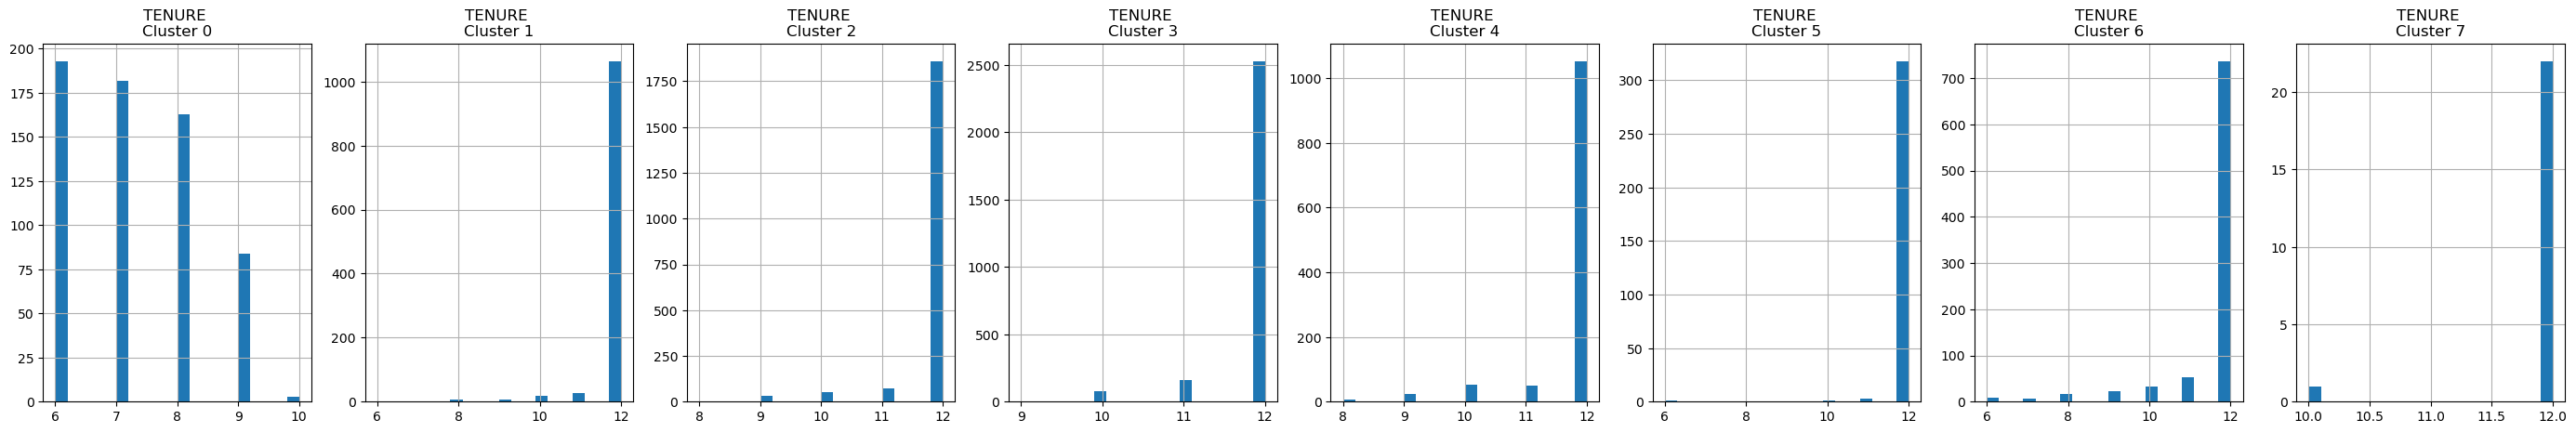

In [60]:
for i in creditcard_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range (8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']== j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i,j))
    plt.show

In [61]:
creditcard_order = creditcard_df_cluster.sort_values(by = 'cluster')
creditcard_order

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
3874,2271.787500,1.000000,0.00,0.00,0.00,2866.563908,0.000000,0.000000,0.000000,0.250000,5,0,8000.0,327.593428,365.820843,0.000000,8,0
5871,1585.763627,0.625000,85.69,85.69,0.00,2649.776206,0.125000,0.125000,0.000000,0.250000,6,2,3000.0,316.556160,538.259971,0.000000,8,0
7235,162.267397,1.000000,907.99,907.99,0.00,339.493008,1.000000,1.000000,0.000000,0.166667,2,8,1120.0,1223.617997,75.319725,1.000000,6,0
8535,854.567510,0.875000,978.26,870.95,107.31,1043.765101,0.875000,0.250000,0.750000,0.125000,2,29,1500.0,2750.062711,841.978782,0.200000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,8700.079439,1.000000,20421.59,16864.56,3557.03,0.000000,1.000000,1.000000,1.000000,0.000000,0,204,17000.0,13002.303930,2746.592199,0.083333,12,7
1190,1893.611922,1.000000,22746.81,15795.42,6951.39,0.000000,1.000000,1.000000,1.000000,0.000000,0,140,18000.0,22558.284570,505.125031,1.000000,12,7
2970,5968.583246,1.000000,22381.97,19150.02,3231.95,0.000000,1.000000,1.000000,0.583333,0.000000,0,87,14500.0,20343.286810,1966.191831,0.000000,12,7
3937,2997.977825,1.000000,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.665220,767.014180,0.750000,12,7


In [62]:
creditcard_order.to_csv('cluster.csv')

# Redução de dimensionalidade

## PCA

In [63]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221862, -1.07645393],
       [-1.13827458,  2.50651633],
       [ 0.9696665 , -0.38355093],
       ...,
       [-0.92620902, -1.81080353],
       [-2.3365579 , -0.65798892],
       [-0.55643152, -0.40047586]])

In [64]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076454
1,-1.138275,2.506516
2,0.969667,-0.383551
3,-0.873617,0.043179
4,-1.599437,-0.688591


In [65]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076454,3
1,-1.138275,2.506516,6
2,0.969667,-0.383551,1
3,-0.873617,0.043179,3
4,-1.599437,-0.688591,3


C:\Users\User\AppData\Local\Temp\ipykernel_14428\376764587.py:2: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x= 'pca1', y='pca2', hue='cluster', data= pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple'])


<Axes: xlabel='pca1', ylabel='pca2'>

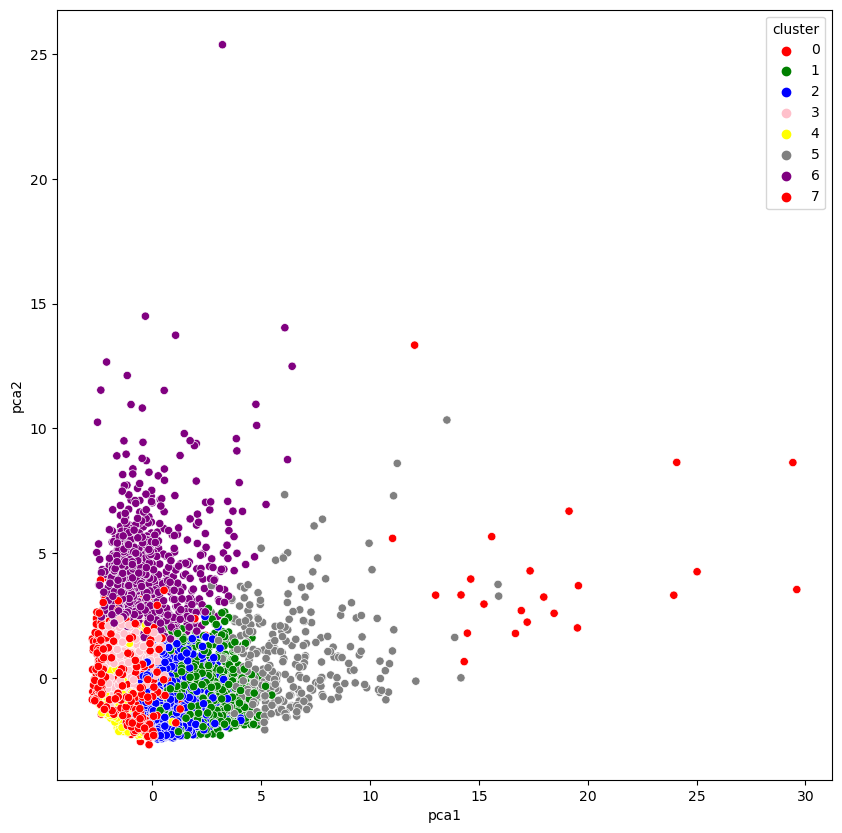

In [68]:
plt.figure(figsize = (10,10))
sns.scatterplot(x= 'pca1', y='pca2', hue='cluster', data= pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple'])

## Autoencoders

In [71]:
creditcard_df_scaled.shape

(8950, 17)

In [72]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [74]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17 Aumenta a dimensionalidade para reduzir a 10 

input_df = Input(shape = (17,))
x = Dense(500, activation ='relu')(input_df)
x = Dense(2000, activation ='relu')(x)
encoded = Dense(10, activation='relu')(x)
x = Dense(2000, activation ='relu')(encoded)
x = Dense(500, activation ='relu')(x)
decoded = Dense(17)(x)

In [77]:
# autoencoder
autoencoder = Model(input_df, decoded)
# encoder
encoder = Model(input_df, encoded)

In [80]:
autoencoder.compile(optimizer='Adam', loss = 'mean_squared_error')

In [81]:
autoencoder.fit(creditcard_df_scaled,creditcard_df_scaled, epochs=50)

Epoch 1/50

280/280 [==============================] - 10s 30ms/step - loss: 0.1850
Epoch 2/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0766
Epoch 3/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0574
Epoch 4/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0670
Epoch 5/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0560
Epoch 6/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0520
Epoch 7/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0445
Epoch 8/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0356
Epoch 9/50
280/280 [==============================] - 9s 30ms/step - loss: 0.0348
Epoch 10/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0598
Epoch 11/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0482
Epoch 12/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0631
Epoch 13/50

In [ ]:
compact = encoder.predict(creditcard_df_scaled)

In [138]:
wcss_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans (n_clusters = i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_);

C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

Text(0, 0.5, 'WCSS')

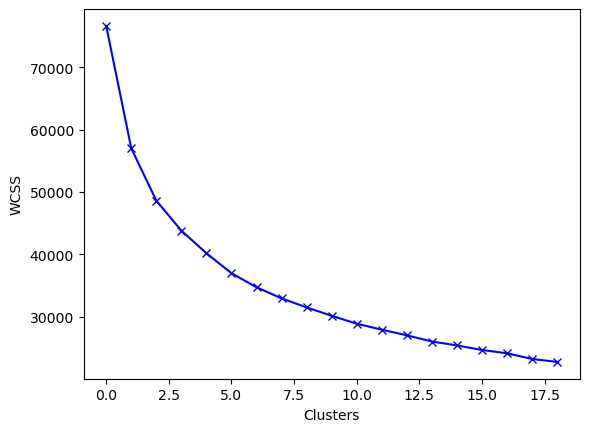

In [139]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [140]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

C:\Users\User\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [141]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 3, 0, ..., 2, 2, 2]), (8950,))

In [142]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
df_cluster_at

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


In [145]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data=prin_comp, columns=['pca1', 'pca2']) 
pca_df

,pca1,pca2
0,-1.495003,-0.137216
1,1.235664,-1.221222
2,-1.577148,0.158977
3,-0.098830,-0.101019
4,-1.364401,-0.287822
...,...,...
8945,-0.086677,0.646016
8946,-0.505727,0.279768
8947,-0.271691,0.396061
8948,1.082920,-0.182811


In [146]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,-1.495003,-0.137216,0
1,1.235664,-1.221222,3
2,-1.577148,0.158977,0
3,-0.098830,-0.101019,0
4,-1.364401,-0.287822,0
...,...,...,...
8945,-0.086677,0.646016,2
8946,-0.505727,0.279768,2
8947,-0.271691,0.396061,2
8948,1.082920,-0.182811,2


<Axes: xlabel='pca1', ylabel='pca2'>

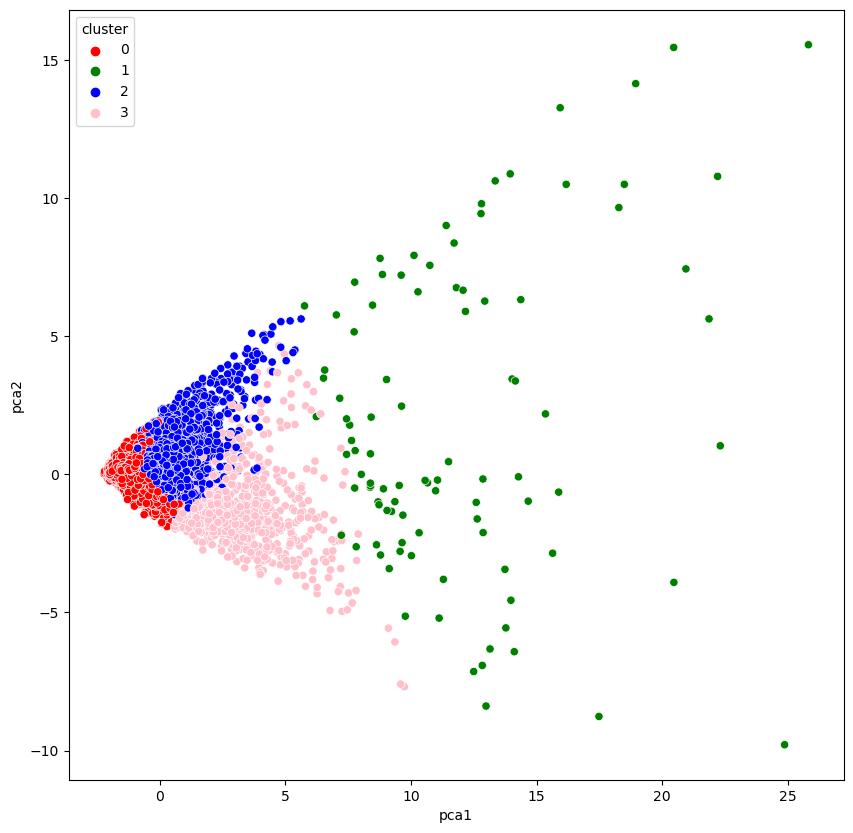

In [147]:
plt.figure(figsize = (10,10))
sns.scatterplot(x= 'pca1', y='pca2', hue='cluster', data= pca_df, palette=['red', 'green', 'blue', 'pink'])

In [148]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')

In [149]:
df_cluster_ordered.to_csv('cluster_ordered.csv')